In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import os
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import random
from sklearn.model_selection import train_test_split
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import talos

np.random.seed(123)

In [10]:
test_folder = '/Users/abdullahaldaffaie/Documents/Flatiron_Curriculum /Flatiron_Projects/phase_4/chest_xray/test'
train_folder = '/Users/abdullahaldaffaie/Documents/Flatiron_Curriculum /Flatiron_Projects/phase_4/chest_xray/train'
val_folder = '/Users/abdullahaldaffaie/Documents/Flatiron_Curriculum /Flatiron_Projects/phase_4/chest_xray/val'

In [11]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(80, 80),
        batch_size = 624,
        class_mode='binary') 

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(80, 80),
        batch_size= 5216,
        class_mode='binary')

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(80, 80),
        batch_size = 16,
        class_mode='binary')



Found 624 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [12]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [13]:
print(train_images.shape)
print(test_images.shape)
print(val_images.shape)
print(train_labels.shape)
print(test_labels.shape)
print(val_labels.shape)

(5216, 80, 80, 3)
(624, 80, 80, 3)
(16, 80, 80, 3)
(5216,)
(624,)
(16,)


In [6]:
train_generator.class_indices 

{'NORMAL': 0, 'PNEUMONIA': 1}

In [7]:
test_generator.class_indices 

{'NORMAL': 0, 'PNEUMONIA': 1}

In [8]:
val_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [9]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)

In [10]:
print(train_img.shape)
print(test_img.shape)

(5216, 19200)
(624, 19200)


In [12]:
train_y = np.reshape(train_labels[:], (5216,1))
test_y = np.reshape(test_labels[:], (624,1))
print(test_y.shape)
print(train_y.shape)

(624, 1)
(5216, 1)


Label: 0.0


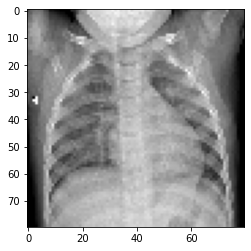

In [13]:
sample_image = train_images[0]
sample_label = train_labels[0]
display(plt.imshow(sample_image))
print('Label: {}'.format(sample_label))

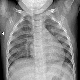

In [14]:
array_to_img(train_images[0])

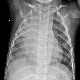

In [15]:
array_to_img(train_images[10])

In [16]:
print(train_images.shape)
print(test_images.shape)
print(val_images.shape)
print(train_labels.shape)
print(test_labels.shape)
print(val_labels.shape)

(5216, 80, 80, 3)
(624, 80, 80, 3)
(16, 80, 80, 3)
(5216,)
(624,)
(16,)


In [17]:
print(train_img.shape)
print(test_img.shape)
print(train_y.shape)
print(test_y.shape)

(5216, 19200)
(624, 19200)
(5216, 1)
(624, 1)


In [14]:
model = Sequential()

    
model.add(layers.Conv2D(128, (3, 3),
                             activation= 'relu',
                         input_shape=(80, 80, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation= 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation= 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(.25))
model.add(layers.Dense(100, activation= 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.compile(loss='binary_crossentropy',
                  optimizer= 'adam',
                  metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0

In [17]:
history= model.fit(train_images, train_labels, 
                             batch_size= 50, 
                              epochs=10, 
                              validation_data=(test_images, test_labels),
                               verbose= 1)

Epoch 1/10
105/105 [==============================] - 60s 575ms/step - loss: 0.3350 - accuracy: 0.8514 - val_loss: 0.3697 - val_accuracy: 0.8413
Epoch 2/10
105/105 [==============================] - 62s 594ms/step - loss: 0.1289 - accuracy: 0.9526 - val_loss: 0.5125 - val_accuracy: 0.8157
Epoch 3/10
105/105 [==============================] - 63s 603ms/step - loss: 0.1133 - accuracy: 0.9553 - val_loss: 0.7431 - val_accuracy: 0.7885
Epoch 4/10
105/105 [==============================] - 62s 595ms/step - loss: 0.1096 - accuracy: 0.9592 - val_loss: 0.7427 - val_accuracy: 0.7708
Epoch 5/10
105/105 [==============================] - 67s 634ms/step - loss: 0.0915 - accuracy: 0.9666 - val_loss: 0.8093 - val_accuracy: 0.8045
Epoch 6/10
105/105 [==============================] - 65s 618ms/step - loss: 0.0725 - accuracy: 0.9749 - val_loss: 0.8301 - val_accuracy: 0.7933
Epoch 7/10
105/105 [==============================] - 65s 618ms/step - loss: 0.0716 - accuracy: 0.9735 - val_loss: 0.9321 - val_ac

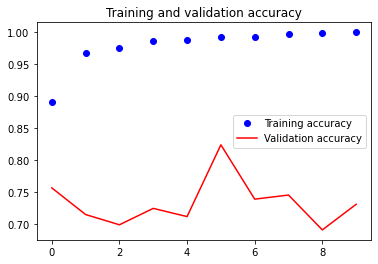

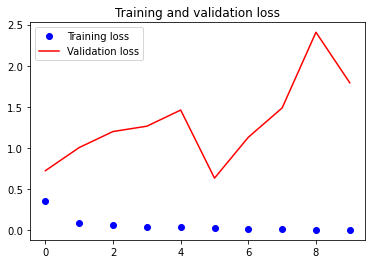

In [17]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()